<a id=top-page></a>
# `pykitPIV` demo: Upload an external flow field generated with synthetic turbulence

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#upload-velocity-field">Upload flow field generated with synthetic turbulence</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-update-time-sep">Update time separation</a></li>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [29]:
n_images = 4

In [30]:
image_size = (124,124)

In [31]:
size_buffer = 2

In [32]:
figsize = (5,4)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [33]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,3),
                     distances=(1,2),
                     densities=(0.4,0.41),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [34]:
image = Image(random_seed=100)

In [35]:
image.add_particles(particles)

Particles added to the image.


<a id=upload-velocity-field></a>
***

## Upload flow field generated with synthetic turbulence

[Go to the top](#top-page)

In [36]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer)

In [37]:
grid_size = 128
n_modes = 100

In [38]:
u_df = pd.read_csv('../docs/data/u_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
v_df = pd.read_csv('../docs/data/v_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
w_df = pd.read_csv('../docs/data/w_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()

u_tensor = np.reshape(u_df, (grid_size,grid_size,grid_size))
v_tensor = np.reshape(v_df, (grid_size,grid_size,grid_size))
w_tensor = np.reshape(w_df, (grid_size,grid_size,grid_size))

In [39]:
synth_turb_gen_velocity_field = np.zeros((1,2,128,128))
synth_turb_gen_velocity_field[0,0,:,:] = u_tensor[:,:,0]
synth_turb_gen_velocity_field[0,1,:,:] = v_tensor[:,:,0]

In [40]:
flowfield.upload_velocity_field(synth_turb_gen_velocity_field)

The same velocity field will be applied to all PIV image pairs.


In [41]:
image.add_flowfield(flowfield)

Velocity field added to the image.


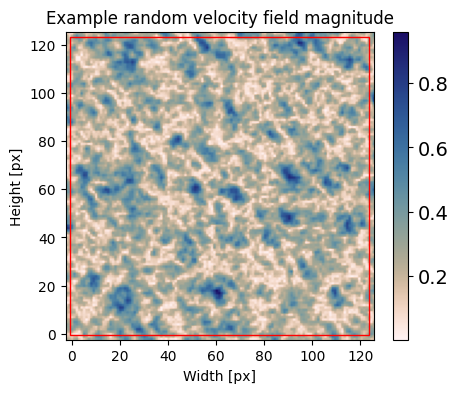

In [42]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.lapaz_r,
                                    figsize=figsize, 
                                    filename='synthetic-turbulence-demo-velocity-field-magnitude.png');

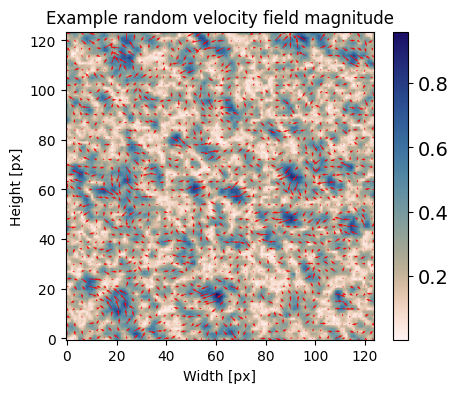

In [43]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=3,
                                    quiver_color='r',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.lapaz_r,
                                    figsize=figsize,
                                    filename='synthetic-turbulence-demo-velocity-field-magnitude-quiver.png');

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [44]:
motion = Motion(particles, 
                flowfield, 
                time_separation=2)

In [ ]:
motion.runge_kutta_4th(n_steps=20)

In [ ]:
motion.plot_particle_motion(0,
                            s=3,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=(5,5),
                            filename='synthetic-turbulence-demo-displacement.png');

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [ ]:
image.add_motion(motion)

In [ ]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

In [ ]:
image.plot_image_pair(0,
                      with_buffer=False, 
                      xlabel='Width [px]',
                      ylabel='Height [px]',
                      title='PIV image pair $(I_1, I_2)$\nfrom synthetic turbulence',
                      cmap=cmc.oslo,
                      figsize=(6,4.5), 
                      dpi=600,
                      filename='synthetic-turbulence-demo-PIV-image-I1-I2.png');

***